# STUDENT PERFORMANCE INDICATOR

#### Life cycle of Machine Learning Project
    - Understanding the Problem Statement
    - Data Collection
    - Data Checks to perform
    - Exploratory Data Analysis
    - Data Pre-Processing
    - Model Training
    - Choose the Best Model
#### 1) Problem Statement
    - This project understand how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation course.
#### 2) Data Collection
    - Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    - The data consists of 8 columns and 1000 rows.
#### 3) Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
print('IMPORTED')

IMPORTED


#### Import the CSV Data as Pandas DataFrame

In [13]:
df = pd.read_csv('Data/students.csv')
## show top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print(f'The shape of the dataset is {df.shape}')

The shape of the dataset is (1000, 8)


#### Data Checks to Perform
    - Check missing values
    - Check Duplicates
    - Check Data Types
    - Check the number of Unique values of each columns
    - Check statistics of data set
    - Check various categories present in the different categorical column

In [17]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We can see that there is no null values present in dataset.

In [21]:
print(f'There is {df.duplicated().sum()} duplicacies.')

There is 0 duplicacies.


#### Check Data Types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking the number of unique valies of each columns

In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Check statistics of dataset

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
    - From above description of numerical data, all means are very close to each other - between 66 and 68.05
    - All standard deviations are also close - between 14.6 and 15.19
    - While there is a minimum score 0 for math, for writing is much higher = 10 and for reading yet higher = 17

#### Exploring Data

In [36]:
cat_col = [feature for feature in df.columns if df[feature].dtypes == 'object']
num_col = [feature for feature in df.columns if df[feature].dtypes != 'object']

In [46]:
print('='*50)
print(f'Number of Categorical Columns = {len(cat_col)}')
print('-'*50)
print(f'Categorical Columns are \n{cat_col}')
print('='*50)
print(f'Number of Numerical Columns = {len(num_col)}')
print('-'*50)
print(f'Numerical Columns are \n{num_col}')
print('='*50)

Number of Categorical Columns = 5
--------------------------------------------------
Categorical Columns are 
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Number of Numerical Columns = 3
--------------------------------------------------
Numerical Columns are 
['math score', 'reading score', 'writing score']


In [40]:
for col in cat_col:
    print('='*50)
    print(f'Categorical Variables present in [{col}]:')
    print(df[col].value_counts())
    print('='*50)

Categorical Variables present in [gender]:
gender
female    518
male      482
Name: count, dtype: int64
Categorical Variables present in [race/ethnicity]:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Categorical Variables present in [parental level of education]:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Categorical Variables present in [lunch]:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Categorical Variables present in [test preparation course]:
test preparation course
none         642
completed    358
Name: count, dtype: int64


#### Feature Engineering

In [42]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


##### So, math score, reading score and writing score are numerical columns and we can add all of them to make it a single columns as total_score

In [47]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average_score'] = df['total_score']/3
# df.drop(columns=['math score', 'reading score', 'writing score'], inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()

print(f'Number of Students with full marks in Maths = {math_full}')
print(f'Number of Students with full marks in Reading = {reading_full}')
print(f'Number of Students with full marks in Writing = {writing_full}')


Number of Students with full marks in Maths = 7
Number of Students with full marks in Reading = 17
Number of Students with full marks in Writing = 14


In [53]:
math_less_20 = df[df['math score'] <= 20]['average_score'].count()
reading_less_20 = df[df['reading score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average_score'].count()

print(f'Number of Students with less then 20 marks in Maths = {math_less_20}')
print(f'Number of Students with less then 20 marks in Reading = {reading_less_20}')
print(f'Number of Students with less then 20 marks in Writing = {writing_less_20}')


Number of Students with less then 20 marks in Maths = 4
Number of Students with less then 20 marks in Reading = 1
Number of Students with less then 20 marks in Writing = 3


#### Insights
    - From above values we get students have performed the worst in Maths
    - Best performance is in reading section and writing section

#### Exploring Data Vizualization
##### Vizualize average score distribution to make some conclusion
    -- Hisogram
    -- Kernel Distribution Function

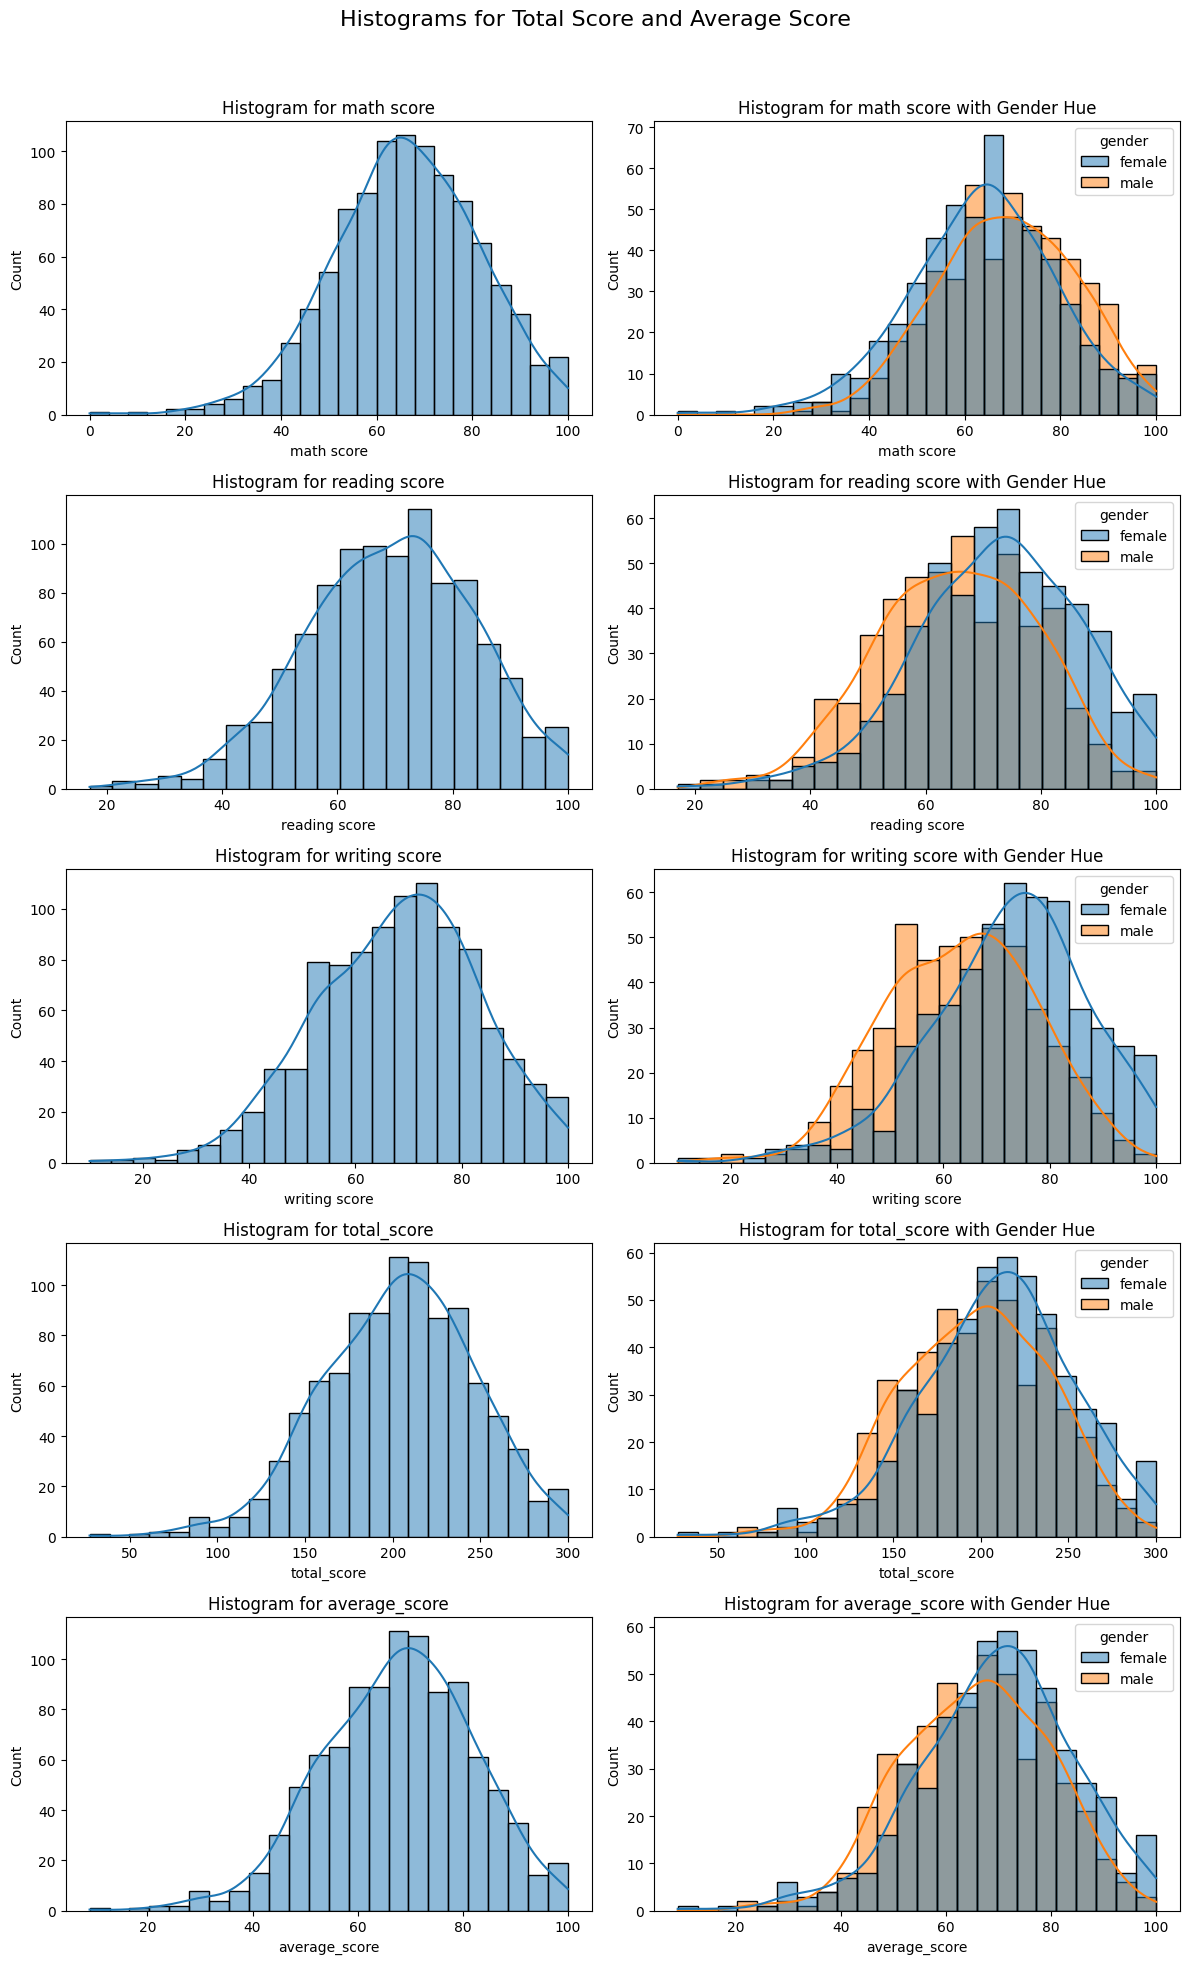

In [69]:
## plotting histogram for total-score and average-score
numeric_columns = df.select_dtypes(exclude='object').columns

# Set up the figure
plt.figure(figsize=(12,20))  # Adjust height for better spacing
plt.suptitle('Histograms for Total Score and Average Score', fontsize=16)

for idx, col in enumerate(numeric_columns):
    # Plot histogram without hue
    plt.subplot(len(numeric_columns), 2, 2 * idx + 1)  # Subplot for each column
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Plot histogram with hue (e.g., 'gender')
    plt.subplot(len(numeric_columns), 2, 2 * idx + 2)  # Second plot for hue
    sns.histplot(data=df, x=col, kde=True, hue='gender')
    plt.title(f'Histogram for {col} with Gender Hue')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()

##### Insights
    Female students are good in every aspects rather than male.

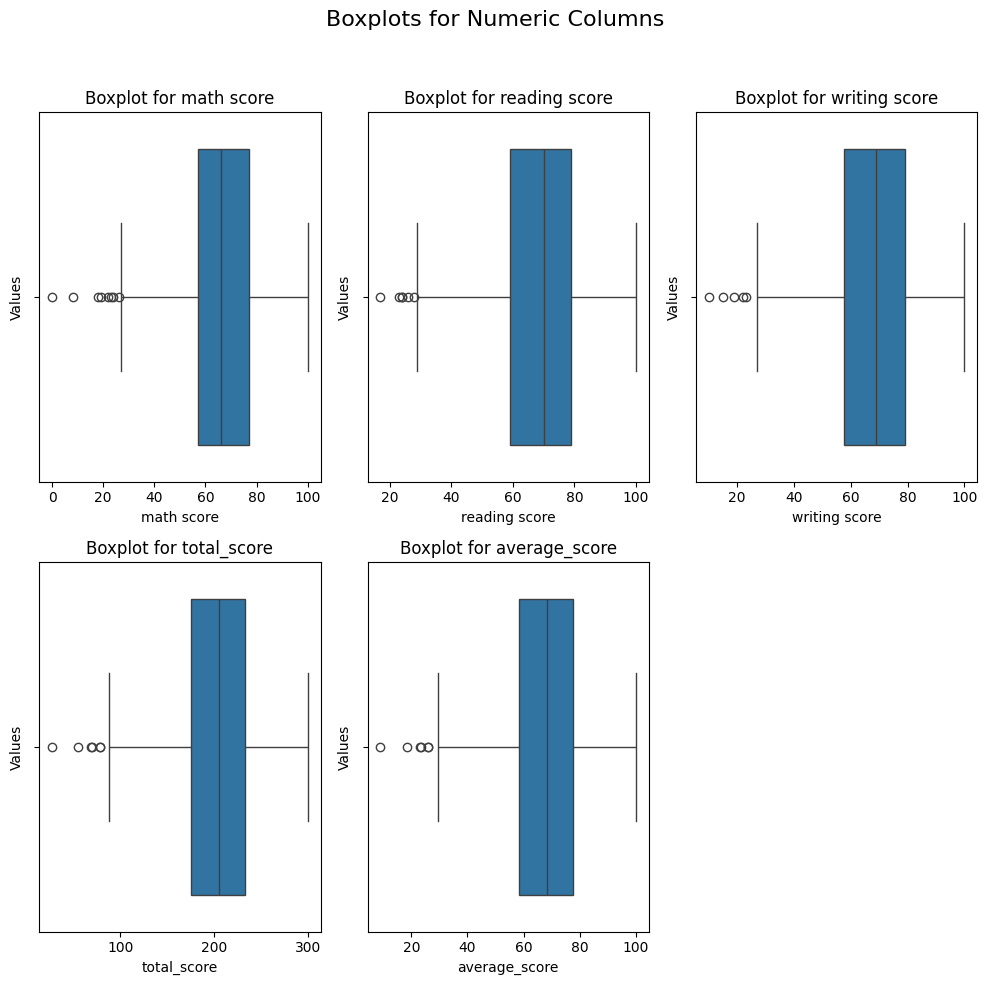

In [67]:
numeric_columns = df.select_dtypes(exclude='object').columns

# Set up the figure
plt.figure(figsize=(10,10))  # Adjust height for better spacing
plt.suptitle('Boxplots for Numeric Columns', fontsize=16)

for idx, col in enumerate(numeric_columns, 1):
    # Create a subplot for each numeric column
    plt.subplot(2,3, idx)  # Single column layout
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.show()


##### The outliers present in the code can be neglected, as the number of outliers are very less.